In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
!pip install --upgrade pygad

  Using cached pygad-3.3.1-py3-none-any.whl.metadata (19 kB)
Using cached pygad-3.3.1-py3-none-any.whl (84 kB)
  Attempting uninstall: pygad
    Found existing installation: pygad 2.16.1
    Uninstalling pygad-2.16.1:
      Successfully uninstalled pygad-2.16.1


In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
import pygad


In [7]:
app_dataset= pd.read_csv("/content/drive/MyDrive/AI Proj/application_record.csv")
stat_dataset= pd.read_csv("/content/drive/MyDrive/AI Proj/credit_record.csv")

In [8]:
app_dataset


,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2.0
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1.0
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1.0
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1.0
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2.0


In [9]:
stat_dataset

,ID,MONTHS_BALANCE,STATUS
0,5001711,0,X
1,5001711,-1,0
2,5001711,-2,0
3,5001711,-3,0
4,5001712,0,C
...,...,...,...
1048570,5150487,-25,C
1048571,5150487,-26,C
1048572,5150487,-27,C
1048573,5150487,-28,C


In [10]:
# numeric_columns = [column for column in app_dataset.columns if app_dataset.dtypes[column] == 'float64' or app_dataset.dtypes[column] == '' ]



['CODE_GENDER',
 'FLAG_OWN_CAR',
 'FLAG_OWN_REALTY',
 'NAME_INCOME_TYPE',
 'NAME_EDUCATION_TYPE',
 'NAME_FAMILY_STATUS',
 'NAME_HOUSING_TYPE',
 'OCCUPATION_TYPE']

In [10]:
app_dataset.drop_duplicates(inplace=True)
stat_dataset.drop_duplicates(inplace=True)

# Map credit statuses and select row with maximum status for each ID
status_mapping = {'C': 0, 'X': 0, '0': 1, '1': 1, '2': 1, '3': 1, '4': 1, '5': 1}
stat_dataset['STATUS'] = stat_dataset['STATUS'].map(status_mapping)

In [39]:
# max_status_rows['MAX_STATUS']
stat_dataset['idxmax'] = stat_dataset.groupby('ID')['STATUS'].transform(lambda x: x.idxmax())

# max_status_rows
stat_dataset

,ID,MONTHS_BALANCE,STATUS,idxmax
0,5001711,0,0,0
4,5001712,0,0,4
23,5001713,0,0,23
45,5001714,0,0,45
60,5001715,0,0,60
...,...,...,...,...
1048494,5150482,-11,0,1048494
1048512,5150483,0,0,1048512
1048530,5150484,0,0,1048530
1048543,5150485,0,1,1048543


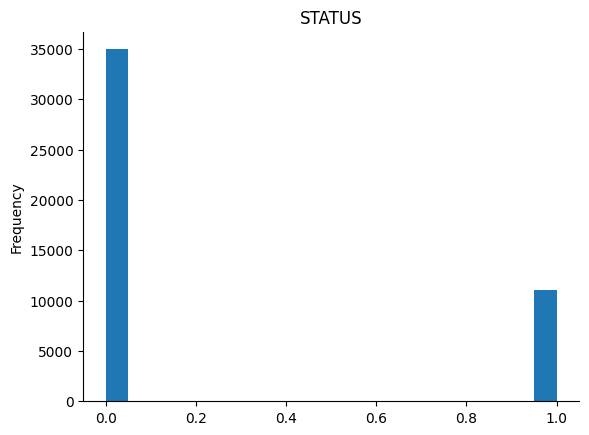

In [40]:
from matplotlib import pyplot as plt
stat_dataset['STATUS'].plot(kind='hist', bins=20, title='STATUS')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [12]:
stat_dataset.drop_duplicates(subset='idxmax', keep='first', inplace=True)

In [13]:
stat_dataset.shape

(45985, 4)

In [14]:
merged_data = pd.merge(app_dataset, stat_dataset, on='ID', how='inner')
merged_data = pd.DataFrame(merged_data)
merged_data

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,...,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,idxmax
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,0,0,92951
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,...,-4542,1,1,0,0,NaN,2.0,0,0,92966
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,...,-1134,1,0,0,0,Security staff,2.0,0,0,92977
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,0,1,92999
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,...,-3051,1,0,1,1,Sales staff,1.0,-22,0,93004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,5149828,M,Y,Y,0,315000.0,Working,Secondary / secondary special,Married,House / apartment,...,-2420,1,0,0,0,Managers,2.0,0,1,1040847
36453,5149834,F,N,Y,0,157500.0,Commercial associate,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,0,0,1040948
36454,5149838,F,N,Y,0,157500.0,Pensioner,Higher education,Married,House / apartment,...,-1325,1,0,1,1,Medicine staff,2.0,0,0,1041038
36455,5150049,F,N,Y,0,283500.0,Working,Secondary / secondary special,Married,House / apartment,...,-655,1,0,0,0,Sales staff,2.0,0,1,1044484


from matplotlib import pyplot as plt
_df_0['CNT_CHILDREN'].plot(kind='hist', bins=20, title='CNT_CHILDREN')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['AMT_INCOME_TOTAL'].plot(kind='hist', bins=20, title='AMT_INCOME_TOTAL')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['DAYS_BIRTH'].plot(kind='hist', bins=20, title='DAYS_BIRTH')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['DAYS_EMPLOYED'].plot(kind='hist', bins=20, title='DAYS_EMPLOYED')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_4.groupby('CODE_GENDER').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_5.groupby('FLAG_OWN_CAR').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_6.groupby('FLAG_OWN_REALTY').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_7.groupby('NAME_INCOME_TYPE').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8.plot(kind='scatter', x='CNT_CHILDREN', y='AMT_INCOME_TOTAL', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_9.plot(kind='scatter', x='AMT_INCOME_TOTAL', y='DAYS_BIRTH', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_10.plot(kind='scatter', x='DAYS_BIRTH', y='DAYS_EMPLOYED', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_11.plot(kind='scatter', x='DAYS_EMPLOYED', y='FLAG_WORK_PHONE', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_12['CNT_CHILDREN'].plot(kind='line', figsize=(8, 4), title='CNT_CHILDREN')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_13['AMT_INCOME_TOTAL'].plot(kind='line', figsize=(8, 4), title='AMT_INCOME_TOTAL')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_14['DAYS_BIRTH'].plot(kind='line', figsize=(8, 4), title='DAYS_BIRTH')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_15['DAYS_EMPLOYED'].plot(kind='line', figsize=(8, 4), title='DAYS_EMPLOYED')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['FLAG_OWN_CAR'].value_counts()
    for x_label, grp in _df_16.groupby('CODE_GENDER')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('CODE_GENDER')
_ = plt.ylabel('FLAG_OWN_CAR')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['FLAG_OWN_REALTY'].value_counts()
    for x_label, grp in _df_17.groupby('FLAG_OWN_CAR')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('FLAG_OWN_CAR')
_ = plt.ylabel('FLAG_OWN_REALTY')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['NAME_INCOME_TYPE'].value_counts()
    for x_label, grp in _df_18.groupby('FLAG_OWN_REALTY')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('FLAG_OWN_REALTY')
_ = plt.ylabel('NAME_INCOME_TYPE')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['NAME_EDUCATION_TYPE'].value_counts()
    for x_label, grp in _df_19.groupby('NAME_INCOME_TYPE')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('NAME_INCOME_TYPE')
_ = plt.ylabel('NAME_EDUCATION_TYPE')

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_20['CODE_GENDER'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_20, x='CNT_CHILDREN', y='CODE_GENDER', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_21['FLAG_OWN_CAR'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_21, x='CNT_CHILDREN', y='FLAG_OWN_CAR', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_22['FLAG_OWN_REALTY'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_22, x='CNT_CHILDREN', y='FLAG_OWN_REALTY', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

<string>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.



from matplotlib import pyplot as plt
import seaborn as sns
figsize = (12, 1.2 * len(_df_23['NAME_INCOME_TYPE'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(_df_23, x='CNT_CHILDREN', y='NAME_INCOME_TYPE', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

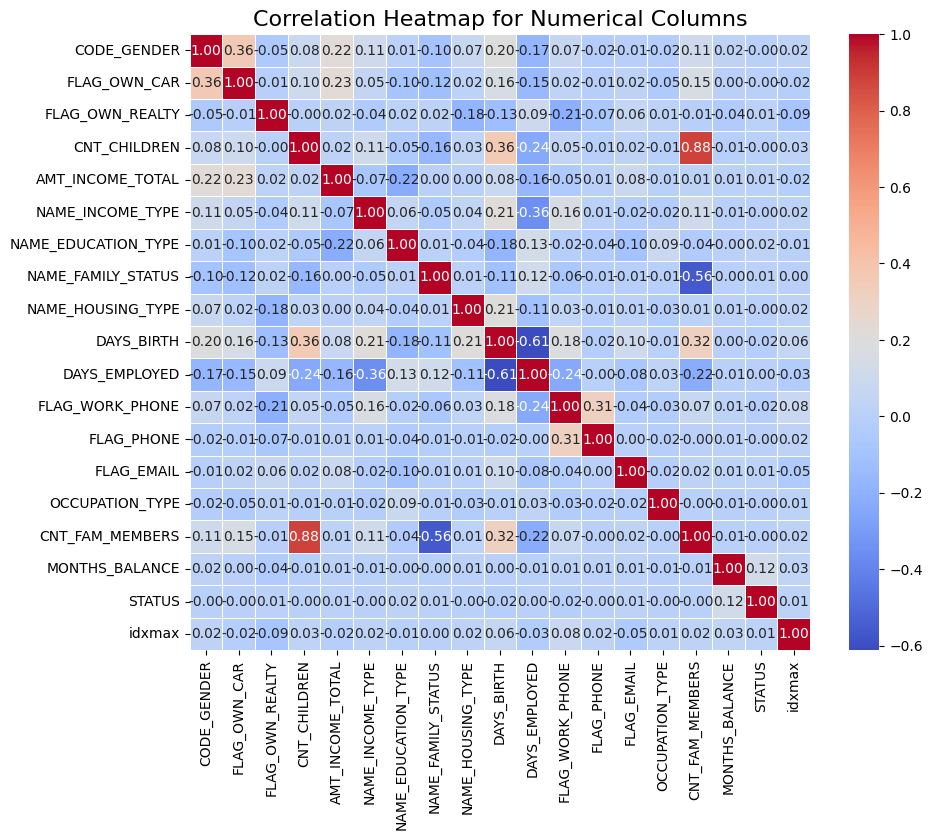

In [45]:
numerical_data = merged_data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()
plt.figure(figsize=(10, 8))  # Adjust figure size
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Numerical Columns", fontsize=16)
plt.show()

In [15]:
# Drop unnecessary columns
merged_data.drop(['ID', 'FLAG_MOBIL'], axis=1, inplace=True)

In [44]:
# Handle missing values
merged_data['OCCUPATION_TYPE'] = merged_data['OCCUPATION_TYPE'].fillna(merged_data['OCCUPATION_TYPE'].mode()[0])
merged_data

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,idxmax
0,1,1,1,0,0.737778,4,1,0,4,0.788966,0.016532,1,0,0,8,0.25,0,0,92951
1,1,1,1,0,0.737778,4,1,0,4,0.788966,0.016532,1,0,0,8,0.25,0,0,92966
2,1,1,1,0,0.115556,4,4,1,1,0.175808,0.025596,0,0,0,16,0.25,0,0,92977
3,0,0,1,0,0.426667,0,4,3,1,0.328887,0.020497,0,1,1,14,0.00,0,1,92999
4,0,0,1,0,0.426667,0,4,3,1,0.328887,0.020497,0,1,1,14,0.00,-22,0,93004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,0,0.515556,4,4,1,1,0.442984,0.022175,0,0,0,10,0.25,0,1,1040847
36453,0,0,1,0,0.204444,0,1,1,1,0.764230,0.025088,0,1,1,11,0.25,0,0,1040948
36454,0,0,1,0,0.204444,1,1,1,1,0.764230,0.025088,0,1,1,11,0.25,0,0,1041038
36455,0,0,1,0,0.453333,4,4,1,1,0.403484,0.026870,0,0,0,14,0.25,0,1,1044484


## pre proccesssing ##

In [17]:
# Handle outliers

num_columns = ['AMT_INCOME_TOTAL', 'DAYS_BIRTH', 'DAYS_EMPLOYED', 'CNT_FAM_MEMBERS', 'MONTHS_BALANCE']
for column in num_columns:
  lower_limit = merged_data[column].quantile(0.01)
  upper_limit = merged_data[column].quantile(0.99)
  merged_data = merged_data[(merged_data[column] >= lower_limit) & (merged_data[column] <= upper_limit)]


In [18]:
# Encode categorical columns
categorical_columns =[column for column in app_dataset.columns if app_dataset.dtypes[column] == 'object']
le = LabelEncoder()
for col in categorical_columns:
  merged_data[col] = le.fit_transform(merged_data[col])

In [19]:
# Scale numerical columns
numerical_columns = num_columns[:4]
scaler = MinMaxScaler()
merged_data[numerical_columns] = scaler.fit_transform(merged_data[numerical_columns])

In [20]:
merged_data= pd.DataFrame(merged_data)

merged_data

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,MONTHS_BALANCE,STATUS,idxmax
0,1,1,1,0,0.737778,4,1,0,4,0.788966,0.016532,1,0,0,8,0.25,0,0,92951
1,1,1,1,0,0.737778,4,1,0,4,0.788966,0.016532,1,0,0,8,0.25,0,0,92966
2,1,1,1,0,0.115556,4,4,1,1,0.175808,0.025596,0,0,0,16,0.25,0,0,92977
3,0,0,1,0,0.426667,0,4,3,1,0.328887,0.020497,0,1,1,14,0.00,0,1,92999
4,0,0,1,0,0.426667,0,4,3,1,0.328887,0.020497,0,1,1,14,0.00,-22,0,93004
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36452,1,1,1,0,0.515556,4,4,1,1,0.442984,0.022175,0,0,0,10,0.25,0,1,1040847
36453,0,0,1,0,0.204444,0,1,1,1,0.764230,0.025088,0,1,1,11,0.25,0,0,1040948
36454,0,0,1,0,0.204444,1,1,1,1,0.764230,0.025088,0,1,1,11,0.25,0,0,1041038
36455,0,0,1,0,0.453333,4,4,1,1,0.403484,0.026870,0,0,0,14,0.25,0,1,1044484


In [21]:
target = merged_data['STATUS']
X = merged_data.drop('STATUS', axis=1)
correl = []

for col in X.columns:
    correlation = X[col].corr(target)  # Compute correlation
    correl.append((col, correlation))  # Store column name and correlation


correl_df = pd.DataFrame(correl, columns=['Feature', 'Correlation'])

correl_df


,Feature,Correlation
0,CODE_GENDER,-0.002530
1,FLAG_OWN_CAR,-0.002425
2,FLAG_OWN_REALTY,0.011477
3,CNT_CHILDREN,-0.002581
4,AMT_INCOME_TOTAL,0.006676
5,NAME_INCOME_TYPE,-0.000107
6,NAME_EDUCATION_TYPE,0.019232
7,NAME_FAMILY_STATUS,0.009804
8,NAME_HOUSING_TYPE,-0.004521
9,DAYS_BIRTH,-0.015701


In [34]:
def fitness_function(solution, solution_idx, data, target, model):
    selected_features = np.where(solution == 1)[0]
    if len(selected_features) == 0:
        return 0  # Penalize solutions with no selected features

    X = data.iloc[:, selected_features]
    X_train, X_val, y_train, y_val = train_test_split(X, target, test_size=0.3, random_state=42)
    model.fit(X_train, y_train)
    accuracy = model.score(X_val, y_val)
    return accuracy


def select_features_with_ga(data, target):
    num_features = data.shape[1]
    ga = pygad.GA(
        num_generations=50,
        num_parents_mating=5,
        fitness_func = lambda ga_instance, solution, solution_idx: fitness_function(solution, solution_idx, data, target, DecisionTreeClassifier(random_state=42)), #Updated line to make it compatible with pygad 2.16.1 or earlier.
        sol_per_pop=10,
        num_genes=num_features,
        init_range_low=0,
        init_range_high=1,
        mutation_percent_genes=10,
        parent_selection_type="rank",
        crossover_type="single_point",
        mutation_type="random"
    )
    ga.run()
    best_solution, best_solution_fitness, _ = ga.best_solution()
    selected_features = np.where(best_solution >= 1)[0]

    return data.columns[selected_features]



selected = select_features_with_ga(X,target)
selected

Index(['CNT_CHILDREN', 'DAYS_BIRTH', 'MONTHS_BALANCE'], dtype='object')

In [38]:
# Step 4: Model training and evaluation
from sklearn.model_selection import GridSearchCV
def train_and_evaluate(models, param_grids, X_train, X_val, y_train, y_val):
    results = {}
    for model_name, model in models.items():
        grid = GridSearchCV(model, param_grids[model_name], cv=3, scoring='accuracy')
        grid.fit(X_train, y_train)
        best_model = grid.best_estimator_
        val_accuracy = best_model.score(X_val, y_val)
        results[model_name] = {'best_model': best_model, 'val_accuracy': val_accuracy}
    return results

X_train, X_temp, y_train, y_temp = train_test_split(X[selected], target, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define models and parameter grids
models = {
    'DecisionTree': DecisionTreeClassifier(random_state=42),
    'KNN': KNeighborsClassifier(),
    'MLP': MLPClassifier(random_state=42, max_iter=500)
}
param_grids = {
    'DecisionTree': {'max_depth': [3, 5, 10, None]},
    'KNN': {'n_neighbors': [3, 5, 7, 9]},
    'MLP': {'hidden_layer_sizes': [(50,), (100,), (50, 50)], 'alpha': [0.0001, 0.001, 0.01]}
}

# Train and evaluate models
results = train_and_evaluate(models, param_grids, X_train, X_val, y_train, y_val)

for model_name, result in results.items():
    print(f"{model_name} Validation Accuracy: {result['val_accuracy']:.4f}")

# Test evaluation
for model_name, result in results.items():
    test_accuracy = result['best_model'].score(X_test, y_test)
    print(f"{model_name} Test Accuracy: {test_accuracy:.4f}")

DecisionTree Validation Accuracy: 0.7553
KNN Validation Accuracy: 0.7384
MLP Validation Accuracy: 0.7553
DecisionTree Test Accuracy: 0.7584
KNN Test Accuracy: 0.7452
MLP Test Accuracy: 0.7580
